In [1]:
%matplotlib inline

import os
import tarfile
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Baixando arquivos do github e e extraindo em um arquivo csv

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # Cria a pasta datasets/housing
    os.makedirs(housing_path, exist_ok=True)

    # Cria um caminho absoluto para o arquivo .tgz
    tgz_path = os.path.join(housing_path, "housing.tgz")

    # Baixa o arquivo .tgz e joga no caminho criado
    urllib.request.urlretrieve(housing_url, tgz_path)

    # Abre o arquivo, extrai para datasets/housing e depois fecha ele
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path, filter="data")
    housing_tgz.close()

fetch_housing_data()

# Carregando dados em um dataframe

In [3]:
# Carregando dados
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

# Análise exploratória
### Obtendo detalhes do dataframe

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Obtendo uma rápida descricao dos dados
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Descobrindo a contagem de cada tipo de dado na coluna ocean_proximity
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
# Dá um resumo dos atributos numéricos do dataframe
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Plotando os dados usando gráficos

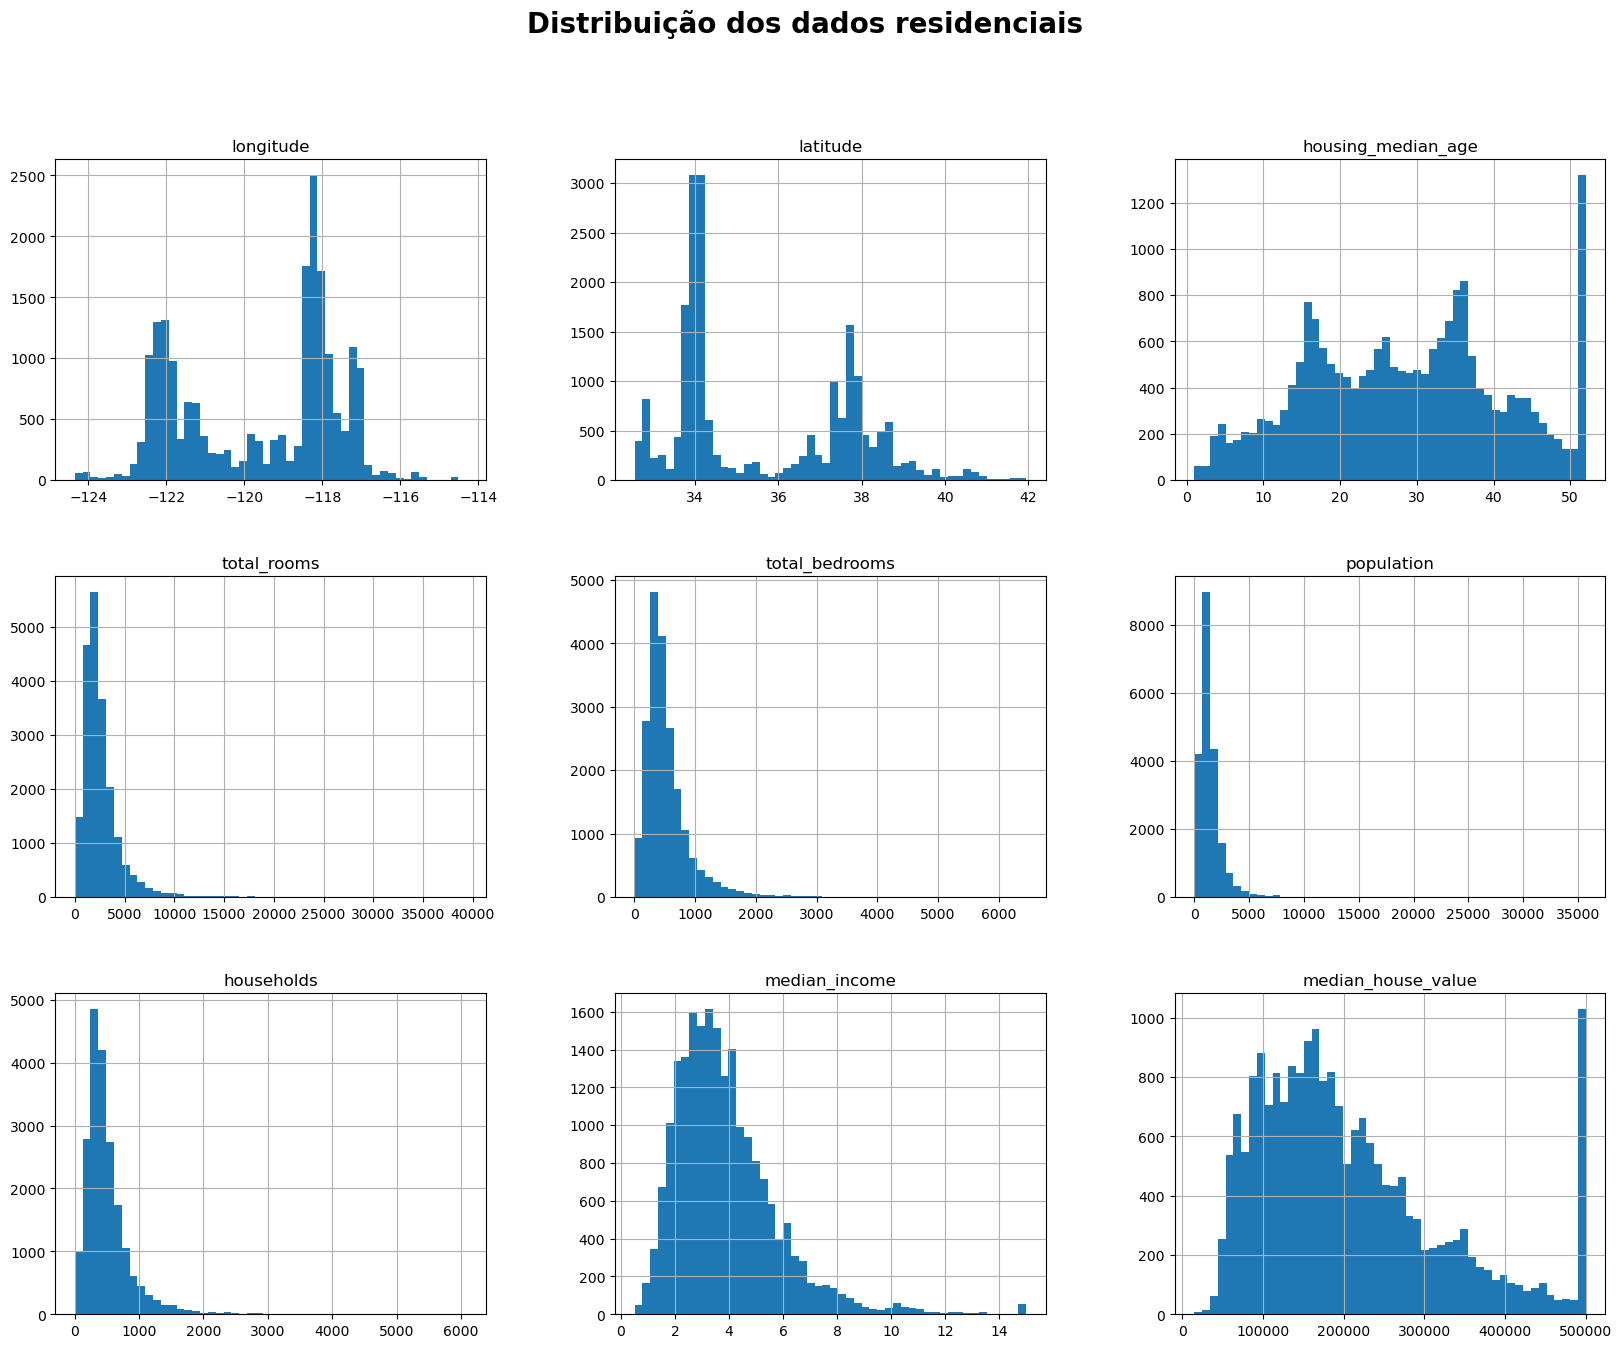

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.suptitle('Distribuição dos dados residenciais', fontsize=20, fontweight='bold')
plt.show();

# Criando um conjunto de testes (método 1)
Esse método é menos complexo, porém, toda vez que executarmos o programa, ele selecionará elementos diferentes (random).\
Em pouco tempo, todos os elementos de teste, passarao pelo conjunto de treinamento. E não queremos isso!

In [9]:
def split_train_test(data, test_ratio):
    # Retorna um array de inteiros de 0 até len(data)
    shuffled_indices = np.random.permutation(len(data))

    # Calcula a quantidade de elementos que farao parte do conjunto de teste
    test_set_size = int(len(data) * test_ratio)

    # Pega as posicoes dos elementos de teste como sendo do array embaralhado do inicio até test_set_size
    test_indices = shuffled_indices[:test_set_size]

    # Pega as posicoes dos elementos de treinamento como sendo de test_set_size até o fim do array embaralhado
    train_indices = shuffled_indices[test_set_size:]

    # dataframe.iloc voce pode passar tambem um array de indices e ele retornara um dataframe mostrando aqueles elementos
    return data.iloc[train_indices], data.iloc[test_indices]

# Geralmente para treinamento se utiliza 20% do conjunto total
train_set, test_set = split_train_test(housing, 0.2)

print(len(train_set))

print(len(test_set))

16512
4128


# Criando um conjunto de testes (método 2)
Esse método consiste em calcular o hash do identificador de cada instancia e verificar se é menor que 20% do valor máximo dele.\
Assim, o conjunto de testes consistente em todas as execucoes do programa, mesmo que sejam adicionadas instancias novas.

In [10]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * (2 ** 32)

def split_train_set_by_id(data, test_ratio, id_column):
    # Pega uma series contendo os ids de cada entrada 
    ids = data[id_column]

    # apply() recebe uma funcao para aplicar a cada elemento do conjunto de ids
    is_in_test_set = ids.apply(lambda id: test_set_check(id, test_ratio)) # retorna uma máscara
    
    return data.loc[~is_in_test_set], data.loc[is_in_test_set]

# Esse conjunto de dados nao tem uma coluna de ID, logo vamos improvisar uma:
housing_with_id = housing.reset_index() # resetar o index
train_set, test_set = split_train_set_by_id(housing_with_id, 0.2, "index")

# Criando um conjunto de testes (método 3)
Esse método utiliza o método train_test_split da biblioteca sklearn.\
É o mais recomendado por já ser testado e validado pela equipe que mantém o Scikit Learn.

In [11]:
# Basicamente esse método faz o que implementamos manualmente no método 2
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # 42 é o numero da sorte :)

# Adicionando uma categoria com estratos
Vamos adicionar uma nova categoria ao dataframe a partir da estratificacao da renda media.\
Suponha que voce queira fazer uma pesquisa representando a populacao dos EUA (51,3% M, 48,7% H) voce deve seguir a mesma proporcao ao tomar um conjunto de pesquisa.\
Da mesma forma fazemos ao tomar um conjunto de testes e treinamento. Assim evitamos o *viés de amostagem*.\
Nesse caso, a categoria Homem é um estrato, e Mulher outro.\
Da mesma maneira, vamos criar estratos baseados na renda média.

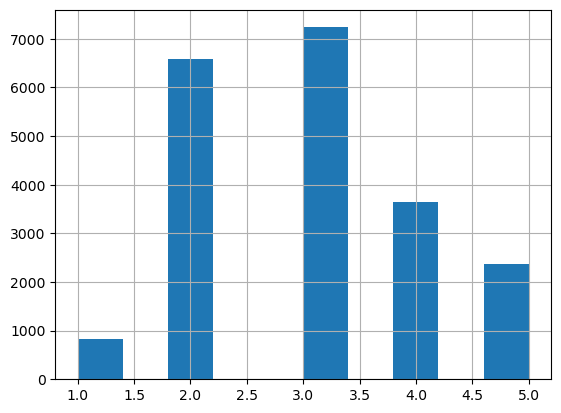

In [12]:
# O método cut subdivide uma coluna em grupos menores de acordo com a configuracao
housing["income_cat"] = pd.cut(housing["median_income"], # a partir de qual coluna
                               bins=[0., 1.5, 3.0, 4.5, 6, np.inf], # subdivisao que vemos quando plotamos a coluna
                               labels=[1, 2, 3, 4, 5]) # qual a categoria

housing["income_cat"].hist()
plt.show();

# Redefinindo o conjunto de estudos
A partir de agora vamos assumir que housing é apenas o conjunto de treinamento.\
Já que ele está corretamente estratificado, a amostragem será identica ao de todo o conjunto.\
Fazemos isso para evitar de trabalhar com o conjunto de testes ao máximo.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

def stratified_split():
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # n_splits = numero de divisoes

    # como nesse caso n_splits=1 na primeira iteracao ja podemos retornar os conjuntos na primeira iteracao
    for train_indices, test_indices in split.split(housing, housing["income_cat"]):
        strat_train_set = housing.loc[train_indices]
        strat_test_set = housing.loc[test_indices]

        # Agora que já separamos os dados em categorias, podemos remover a coluna income_cat
        strat_train_set.drop("income_cat", axis=1, inplace=True)
        strat_test_set.drop("income_cat", axis=1, inplace=True)

        #print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
        return strat_train_set, strat_test_set
        
strat_train_set, strat_test_set = stratified_split()
housing = strat_train_set.copy()

# Visualizando os dados geográficos
### Distribuição geográfica das moradias

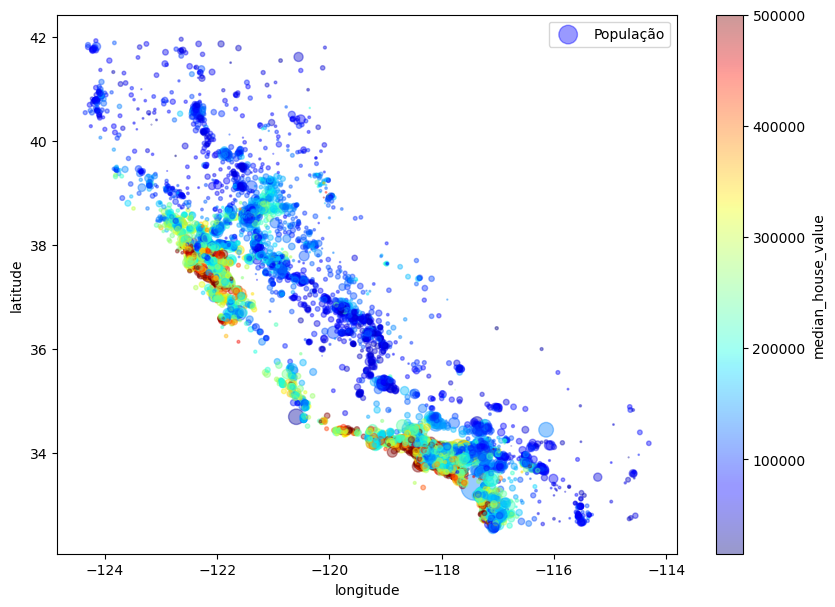

In [14]:
housing.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    alpha=0.4,
    s=housing["population"]/100, 
    label="População", 
    figsize=(10,7),
    c="median_house_value", 
    cmap=plt.get_cmap("jet"), 
    colorbar=True
)

plt.show();

In [15]:
# Download do mapa da california
images_path = os.path.join(".", "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"

print("Baixando", filename)

url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

Baixando california.png


('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x11e477dd0>)

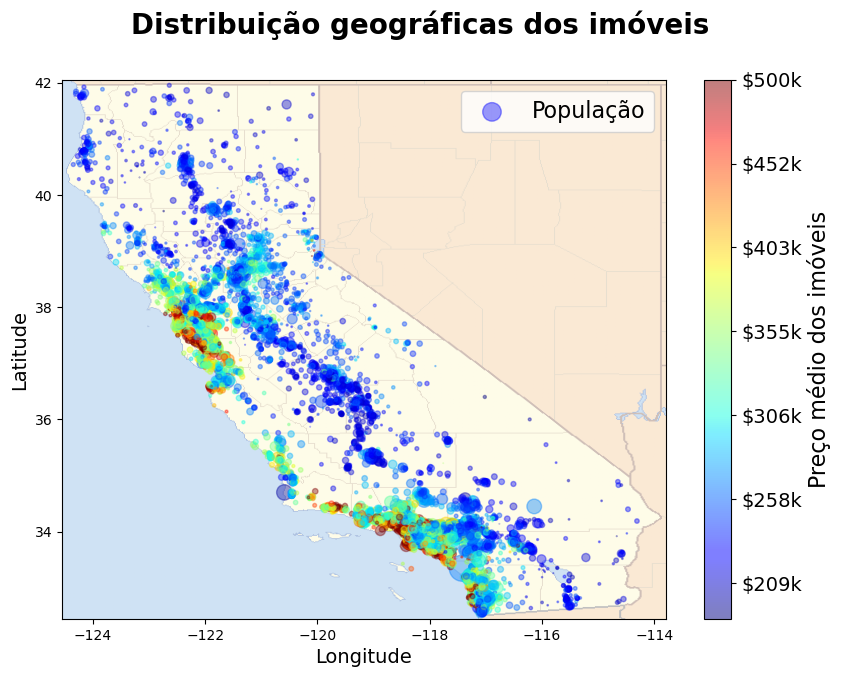

In [16]:
import matplotlib.image as mpimg

california_img = mpimg.imread(os.path.join(images_path, filename))

ax = housing.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    figsize=(10,7),
    c="median_house_value", 
    s=housing['population']/100, 
    label="População",
    cmap=plt.get_cmap("jet"),
    colorbar=False, alpha=0.4
)

plt.imshow(
    california_img, 
    extent=[-124.55, -113.80, 32.45, 42.05], 
    alpha=0.5,
    cmap=plt.get_cmap("jet")
)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.suptitle('Distribuição geográficas dos imóveis', fontsize=20, fontweight='bold')

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Preço médio dos imóveis', fontsize=16)

plt.legend(fontsize=16)
plt.show();

# Buscando correlações
Vamos utilizar o coeficiente de correlacao padrao (r de Pearson).\
Quanto mais proximo de 1, mais correlacionado esse valor está com o campo alvo.\
Quando mais próximo de -1, mais correlacionado também, só que de forma inversamente proporcional.\
Quanto mais próximo de 0, menos correlacionado o campo está com o campo alvo.

In [17]:
corr_matrix = housing.corr(numeric_only=True)

# Vamos exibir começando pelos mais correlacionados
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

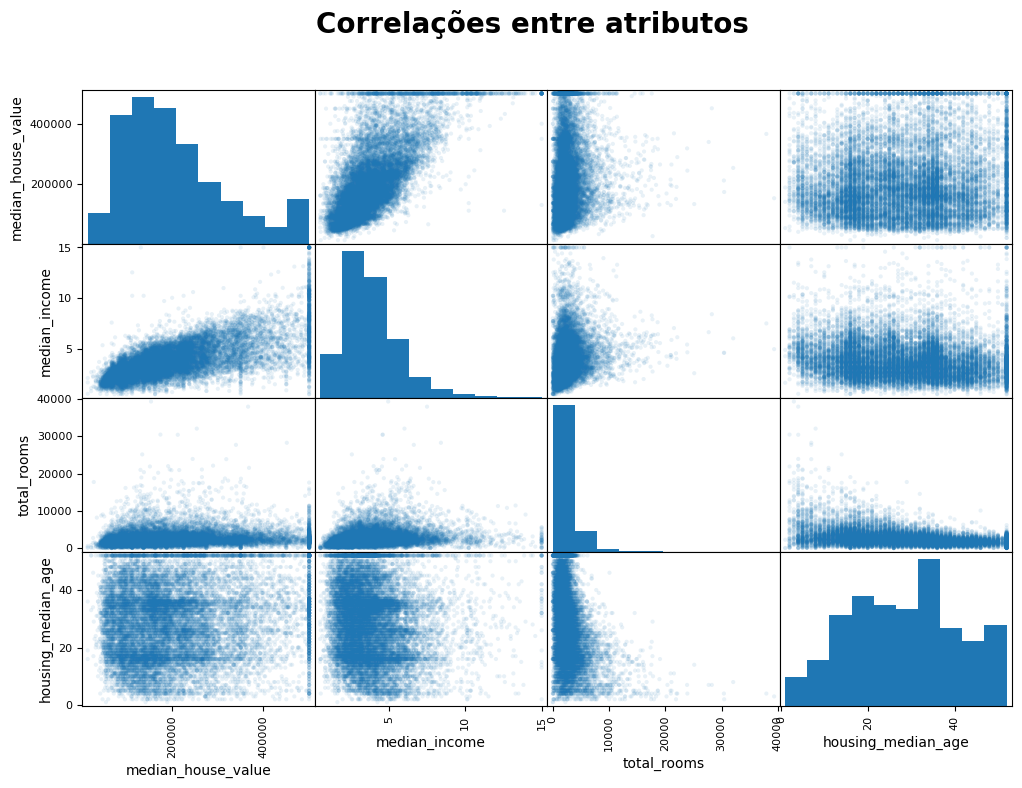

In [18]:
# Vamos utilizar a funcao scatter_matrix do pandas que plota cada atributo
# numérico em relacao a qualquer outro atributo numerico
from pandas.plotting import scatter_matrix

attributes = [
  "median_house_value",
  "median_income",
  "total_rooms",
  "housing_median_age",
]

scatter_matrix(housing[attributes], figsize=(12, 8), alpha=0.1)
plt.suptitle('Correlações entre atributos', fontsize=20, fontweight='bold')
plt.show();

### O atributo mais promissor para prever o valor médio dos imóveis é a renda média
Vimos através de scatter_matrix que a melhor correlacao é entre median_income e median_house_value

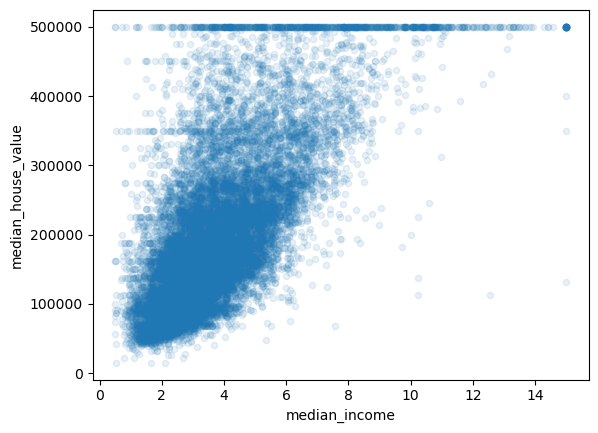

In [19]:
# Vamos analizar essa relacao mais de perto
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show();

# Buscando mais correlações
As vezes podemos brincar com alguns atributos e descobrir outros atributos bastante úteis.

Isso se chama **Feature Engineering**.

In [20]:
# Lembrar que estamos assumindo que o dataframe housing é apenas aquela parte de treinamento
# estratificado que separamos lá em cima
# Temos que fazer isso em todo o dataframe antes de dividir on conjuntos de teste e treinamento

# comodos_por_domicilio = total_comodos / moradores
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

# quartos_por_comodo = total_quartos / total_comodos
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]

# populacao_por_domicilio = populacao / domicilios
housing["population_per_household"] = housing["population"] / housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Preparando os dados para os algoritmos de Machine Learning

In [21]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


Inicialmente, vamos separar as labels dos dados previsores.

Para isso, criamos um conjunto sem a coluna **median_house_value** e, em seguida criamos outro conjunto somente com esses mesmos valores.

In [22]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy() # cria um conjunto somente das labels

# Limpando os dados
A maioria dos algoritmos de Machine Learning não funciona com dados ausentes, logo temos que escolher a melhor forma de preencher essas lacunas em nosso conjunto de treinamento.

Vamos usar a classe SimpleImputer da biblioteca sklearn, que facilmente se encarrega de preencher os dados ausentes do nosso conjunto.

In [23]:
from sklearn.impute import SimpleImputer

# Configuramos o imputer para preencher as lacunas com a mediana
imputer = SimpleImputer(strategy="median")

# Primeiramente vamos remover a coluna com valores não numéricos
housing_num = housing.drop("ocean_proximity", axis=1)

# Ajustamos o imputer aos nossos dados
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [25]:
# Vamos transformar o conjunto de treinamento substituindo os valores ausentes pelas medianas aprendidas
X = imputer.transform(housing_num) # numpy.ndArray

In [26]:
# Vamos converter o resultado da transformação em um DataFrame de volta
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


# Manipulando texto e atributos categóricos
## Sobre o uso de transformadores
Sabemos que algoritmos de machine learning trabalham com números ao invés de strings.

Logo, nessa etapa, vamos cuidar do atributo ocean_proximity usando **transformadores**.

In [27]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


### Convertendo ocean_proximity em um atributo numérico
Podemos criar um OrdinalEncoder, o qual converterá cada string categórica em uma categoria numérica.

In [28]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [29]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### One hot encoding
O problema da abordagem acima é que para os algoritmos de machine learning, dois valores próximos são mais parecidos que outros dois mais distantes, o que não ocorre nos nossos dados.

Sendo assim, vamos usar a abordagem que utiliza um OneHotEncoder que transforma diferentes classes em diferentes colunas. Se um dado pertencer àquela categoria, receberá 1 (um) nessa coluna e 0 nas outras.

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# Retorna uma matriz esparsa do Scipy
# Semelhante a um iterator, só marca onde ficam os números 1 os zeros são gerados
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [31]:
housing_cat_1hot.toarray() # ndarray

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [32]:
# Se precisarmos das classes em string posteriomente
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Transformadores personalizados
Podemos criar nossos próprios transformadores, desde que eles implementem os métodos \_\_init\_\_, fit e transform.

Nesse exemplo criaremos um transformador que criará de forma automática os campos rooms_per_household, population_per_household e bedrooms_per_room (opcional)

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = ["total_rooms", "total_bedrooms", "population", "households"]
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names
]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # sem *args ou **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [34]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

Infelizmente, o scikit learn nos retornou um array Numpy, o que tirou os nomes de colunas. 

Para visualizarmos os gráficos novamente como um DataFrame, temos que criá-lo novamente.

In [35]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index
)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


# Transformações em pipelines 
Um objeto pipeline permite organizar e automatizar o nosso fluxo de trabalho de preparo de dados.

Pipelines trabalham encadeando várias etapas de pré-processamento, transformação e modelagem em um único objeto.

Vamos criar um pipeline para tratar os atributos numéricos.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), # removendo valores nulos 
    ('attribs_adder', CombinedAttributesAdder()), # adicionando atributos novos (feature engineering)
    ('std_scaler', StandardScaler()),
])

In [37]:
# Chama os métodos de fit de cada um dos transformadores de forma encadeada
housing_num_tr = num_pipeline.fit_transform(housing_num)

### Transformando atributos numéricos e categóricos de forma padronizada
O scikit learn disponibiliza um transformador que permite lidar com cada coluna de forma diferente.

Ele é útil quando temos variáveis numéricas e categóricas que precisam de diferentes tipos de pré-processamento.

In [38]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

### Agora nossos dados estão prontos para serem usados!

In [39]:
housing_prepared = full_pipeline.fit_transform(housing)

# Selecionando e treinando um modelo
## Usando o conjunto de dados para treinar modelos
Até agora, já exploramos nosso dataset, tratamos e transformamos os dados e agora falta escolher um modelo para fazer as predições.
### Vamos começar utilizando um modelo de regressão linear

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Agora vamos testar em algumas instancias do conjunto de teste

In [41]:
# Vamos aplicar o nosso pipeline de pré-processamento em algumas instancias de treinamento
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Previsões:", lin_reg.predict(some_data_prepared))

Previsões: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


Agora vamos comparar com os valores reais.

In [42]:
print("Rótulos:", list(some_labels))

Rótulos: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


### Obtendo o Erro Quadrático Médio (RMSE)

In [43]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

A partir dos resultados, vemos que esse não é um bom valor de erro. 

Uma perda preditiva girando na casa de U$68.627 não é nada satisfatória.

Vamos testar outro modelo.

### Usando árvores de decisão

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [45]:
# Analisando a perda do modelo
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**Uma perda de 0 pode indicar que o modelo se sobreajustou ao conjunto de treinamento.**

Como não podemos nem tocar no conjunto de testes, temos que utilizar outras formas de validação.

Uma dessas formas é utilizar parte do conjunto de treinamento como conjunto de testes. Nesse caso, o chamamos de conjunto de validação.

## Avaliando melhor com validação cruzada
A validação cruzada do ScikitLearn em _k-folds_ separa o conjunto de treinamento em k partes diferentes e, em seguida, treina o modelo k vezes. 
A cada rodada de treinamento, uma dessas partes é deixada para a validação e o resto para treinamento. 

No final, recebemos um array com o resultado de cada etapa de treinamento para analisarmos o erro médio no conjunto total de treinamento.

A função de score para a validação cruzada é **oposta à MSE**, logo passaremos neg_mean_squared_error como argumento.

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    tree_reg, # o modelo
    housing_prepared, # dados pré-processados
    housing_labels, # rótulos
    scoring="neg_mean_squared_error", 
    cv=10
)
tree_rmse_scores = np.sqrt(-scores) # função score inversa

In [47]:
def display_scores(scores):
    print("Resultados:", scores)
    print("Média:", scores.mean())
    print("Desvio padrão:", scores.std())

display_scores(tree_rmse_scores)

Resultados: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Média: 71629.89009727491
Desvio padrão: 2914.035468468928


Ainda assim, o nosso modelo continua sobreajustado. 

Vamos tentar outro diferente.

### Usando um modelo de Floresta Aleatória

In [48]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [49]:
# Calculando a perda
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [50]:
# Validação cruzada na floresta aleatória
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(
    forest_reg, 
    housing_prepared, 
    housing_labels,
    scoring="neg_mean_squared_error", 
    cv=10
)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Resultados: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Média: 50435.58092066179
Desvio padrão: 2203.3381412764606


Vimos, até o momento, que o melhor modelo para se fazer as predições é o de Floresta aleatória. Logo vamos utilizar só ele a partir de agora.
# Aperfeiçoando o modelo
### Grid Search
Vamos usar Grid Search para fazer uma bateria de testes com diferentes hiperparametros e descobrir a melhor configuração para o modelo.

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # tenta 12 (3x4) combinações de hiperparametros
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Depois tenta 6 (2x3) combinações com bootstrap setado em False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
# treina usando 5 folds. Totalizando 90 rodadas de treinamento [(12+6)*5]
grid_search = GridSearchCV(
  	forest_reg, param_grid, 
  	cv=5,
  	scoring='neg_mean_squared_error',
  	return_train_score=True
)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
# Exibindo a melhor configuração
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [53]:
# Imprimindo os resultados de cada configuração
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    # Negativa da MSE
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [54]:
# Em um dataframe, esses dados ficam melhores
grid_search_res = pd.DataFrame(grid_search.cv_results_)
#grid_search_res.fillna(value={'param_bootstrap': True})
grid_search_res['param_bootstrap'] = grid_search_res['param_bootstrap'].fillna(True)

grid_search_res.head()

/var/folders/8c/5_ptl6q177zc30d9mggj3md40000gn/T/ipykernel_9929/4033987642.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  grid_search_res['param_bootstrap'] = grid_search_res['param_bootstrap'].fillna(True)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.060497,0.000765,0.002902,0.000122,2,3,True,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.207376,0.005990,0.007344,0.000118,2,10,True,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.610220,0.009094,0.019929,0.000161,2,30,True,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.106958,0.007882,0.002939,0.000067,4,3,True,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.336310,0.007426,0.007673,0.000434,4,10,True,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06


### Random Search
Random Search faz a mesma coisa que a Grid Search, a diferença é que a Random Search escolhe combinações de hiperparametros de forma aleatória.

Geralmente, quando temos uma grande quantidade de hiperparametros, é preferível usar a busca aleatória ao invés de explorar todas as possibilidades possíveis de configuração com Grid Search.

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(
  	forest_reg, 
  	param_distributions=param_distribs,
  	n_iter=10, 
  	cv=5, 
  	scoring='neg_mean_squared_error', 
  	random_state=42
)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1228c7800>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x11e32eff0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [56]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


# Avaliando o modelo no conjunto de testes
Agora, vamos testar o nosso modelo em um cenário de produção

In [57]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

In [58]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)	
final_rmse

47873.26095812988

# Intervalo de confiança
Vamos calcular as perdas de todas as predições de conjunto de teste e estimar um intervalo de confiança de 95% para os erros do modelo.

In [59]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(
	confidence, 
	len(squared_errors) - 1,
	loc=squared_errors.mean(),
	scale=stats.sem(squared_errors)
))

array([45893.36082829, 49774.46796717])

Agora sabemos que nosso modelo estará dentro do intervalo de confiança quando a perda estiver entre 45893 e 49774.

Os próximos passos são relativos à implamtação do modelo em produção.